In [2]:
# Slides are built using
# jupyter nbconvert --to slides --post serve AIISL.ipynb --template output_toggle.tpl

%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 120
rcParams["savefig.dpi"] = 120

In [3]:
# This is needed a second time because of a matplotlib bug in retina implementation
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 120
rcParams["savefig.dpi"] = 120

In [4]:
import numpy as np
import matplotlib.pyplot as pl
from corner import hist2d
from astropy.table import Table
import os

def ungzip(fn):
    import gzip
    import shutil
    with gzip.open('{}.gz'.format(fn), 'rb') as f_in:
        with open(fn, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

def get(url):
    from urllib import request
    with request.urlopen(url) as r:
        return r.read()
            
def download_file(url, file=None):
    if not file:
        file = url.split('/')[-1]
    with open(file, 'wb') as f:
        f.write(get(url))
            
def download_dataset(destfolder="data/",filename="photoz_dataset.txt",url="http://perso.astrophy.u-bordeaux.fr/PGratier/data/photoz_dataset.txt.gz"):
    if os.path.exists(destfolder):
        if os.path.exists("{}/{}".format(destfolder,filename)):
            print("Datafile {}{} already exists.\nDoing nothing".format(destfolder,filename))
            pass
        elif os.path.exists("data/photoz_dataset.txt.gz"):
            print("Archived datafile {}{}.gz already exists.\nUnzipping to {}{}".format(destfolder,filename,destfolder,filename))
            ungzip("{}{}".format(destfolder,filename))
        else:
            print("Datafile {}{} does not exists.\nDownloading {}{}.gz from {}.\nUnzipping to {}{}".format(destfolder,filename,destfolder,filename,url,destfolder,filename))
            download_file(url,file="{}/{}.gz".format(destfolder,filename))
            ungzip("{}/{}".format(destfolder,filename))

    else:
        print("Folder {} does not exist.\nDatafile {}{} does not exists.\nCreating folder {}.\nDownloading {}{}.gz from {}.\nUnzipping to {}{}".format(destfolder,destfolder,filename,destfolder,destfolder,filename,url,destfolder,filename))
        os.mkdir("data/")
        download_file(url,file="{}/{}.gz".format(destfolder,filename))
        ungzip("{}/{}".format(destfolder,filename))
     
download_dataset()

Datafile data/photoz_dataset.txt already exists.
Doing nothing


# An Interactive Introduction to Supervised Learning
## Pierre Gratier
### Laboratoire d'Astrophysique de Bordeaux

<br>
<div align="left">
<img src="images/logo_3DICE.png" style="width:200px"/>
<img src="images/vignette-lab.png" style="width:200px" />
</div>



# Machine learning 
0. Choose a quantity to optimize. For regression, one of:
     - Mean squared errors
     - Median absolute deviation
1. Train
     - Use a large fraction of the dataset (the larger, and more diverse, the better)
2. Validate hyperparameters
     - make sure not to overtrain
     - cross validation
3. Test
     - On *previously unseen* data
4. (interpret)

# But train with what ???

Whatever you want !

- linear models
- polynomials
- neural networks
- ...

# Supervised machine learning

Predict an output property knowning a set of input parameters
 - if property is discrete : classification
 - if property is continuous : regression 

<br>
<div align="left">
<img src="images/regression_tools.jpeg" style="width:700px"/>
</div>


## Toolbox: scikit-learn
http://scikit-learn.org

<br>
<div align="left">
<img src="images/sklearn.jpg" style="width:800px"/>
</div>

# Spoiler: we've been doing machine learning for quite some time 

In [5]:
from sklearn.linear_model import LinearRegression

def linfunc(x):
    return 2*x+3

def nonlinfunc(x):
    return np.sinc(x)

def create_trainset(f, ntrain=20,ntest=1000,noise=0.,seed=1234):
    np.random.seed(seed)
    xmin, xmax = -3, 3
    x_true = np.linspace(xmin-2,xmax+2,ntest)
    x_train = np.random.uniform(xmin, xmax, ntrain)
    y_true = f(x_true)
    y_train = f(x_train)
    y_train += np.random.normal(0,noise,ntrain)
    return x_train, y_train, x_true, y_true

/Users/gratier/venv3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


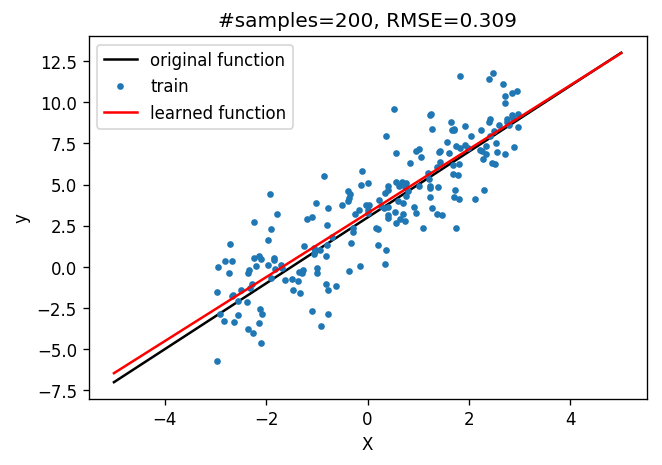

In [6]:
xtrain, ytrain, xtest, ytrue = create_trainset(linfunc, ntrain=200,ntest=1000,noise=2)
pl.plot(xtest,ytrue,'k-',label="original function")
pl.plot(xtrain,ytrain,'C0.',label='train')
reg_eg = LinearRegression()
reg_eg.fit(xtrain.reshape(-1,1), ytrain)
pred = reg_eg.predict(xtest.reshape(-1,1))
pl.plot(xtest,pred,'r-',label='learned function')
rmse = np.sqrt(((ytrue-pred)**2).mean())
pl.title("#samples={}, RMSE={:5.3f}".format(len(xtrain), rmse))
pl.legend(loc='upper left')
pl.xlabel("X")
pl.ylabel("y")
pl.show()

# Decision Trees
<br>
<div align="left">
<img src="images/Treebeard.png.jpeg" style="width:600px"/>
</div>


# Decision Trees
 - non linear machine learning algorithm
 - Can be used for classification or regression
 - Don't need to "prepare" (eg normalise, reparametrize) data
<br>
<div align="left">
<img src="images/decisiontree.gif" style="width:600px"/>
</div>

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def plot_depth(idepth, **kwargs):
    pl.plot(xtest,ytrue,'k-',label="original function")
    pl.plot(xtrain,ytrain,'C0.',label='train')
    reg_eg = DecisionTreeRegressor(max_depth=idepth)
    reg_eg.fit(xtrain.reshape(-1,1), ytrain)
    pred = reg_eg.predict(xtest.reshape(-1,1))
    pl.plot(xtest,pred,'r-',label='learned function')
    rmse = np.sqrt(((ytrue-pred)**2).mean())
    pl.title("#samples={}, max depth={}, RMSE={:5.3f}".format(len(xtrain),idepth, rmse))
    pl.legend(loc='upper left')
    pl.xlabel("X")
    pl.ylabel("y")
    pl.show()

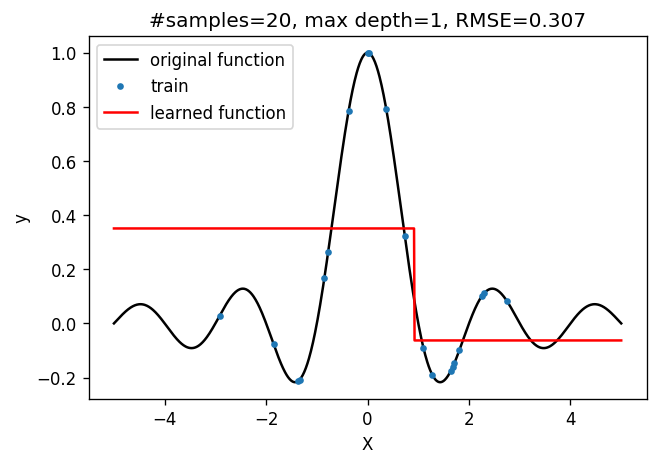

In [8]:
np.random.seed(1234)
xtrain, ytrain, xtest, ytrue = create_trainset(nonlinfunc)
plot_depth(1)

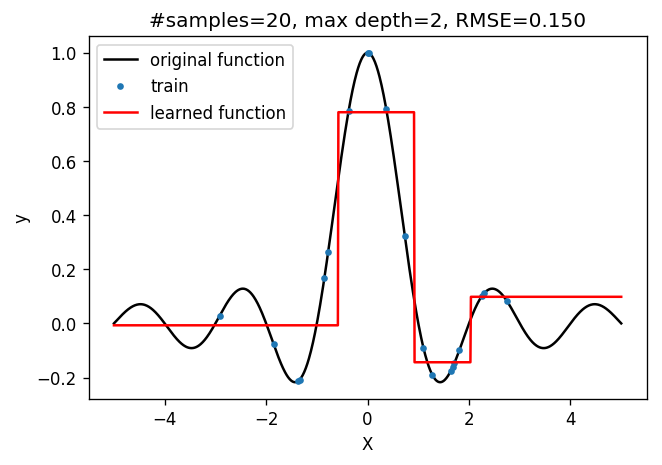

In [9]:
plot_depth(2)

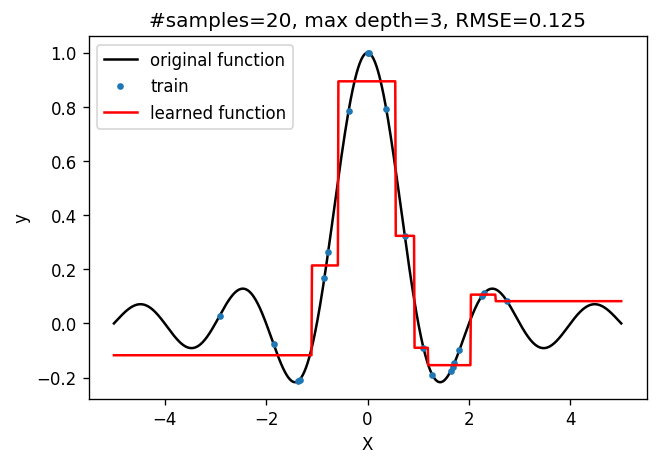

In [10]:
plot_depth(3)

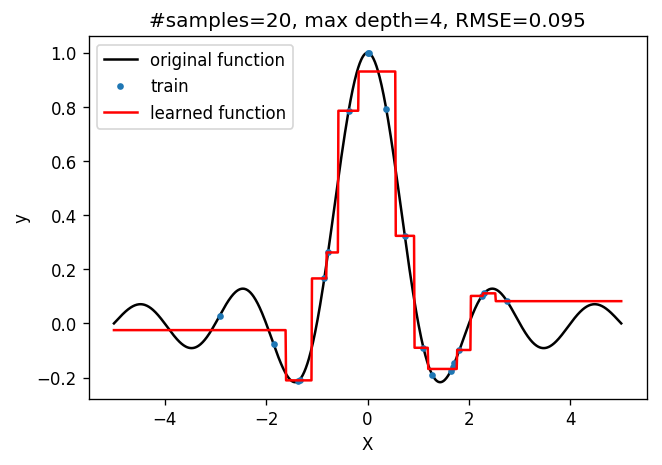

In [11]:
plot_depth(4)

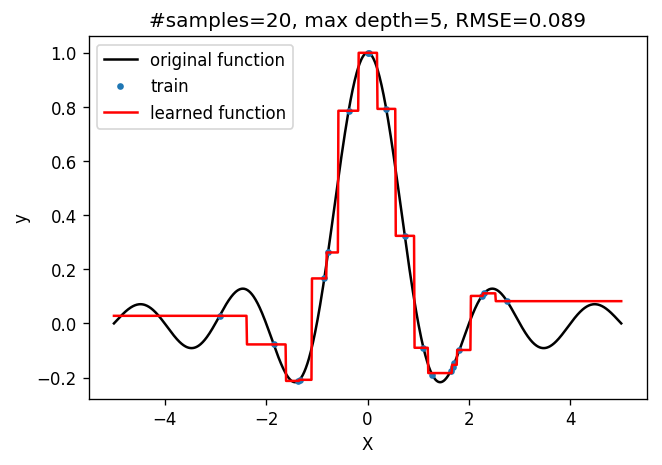

In [12]:
plot_depth(5)

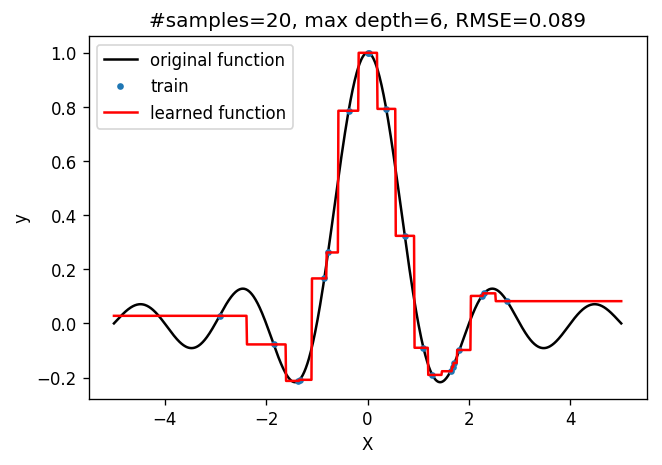

In [13]:
plot_depth(6)

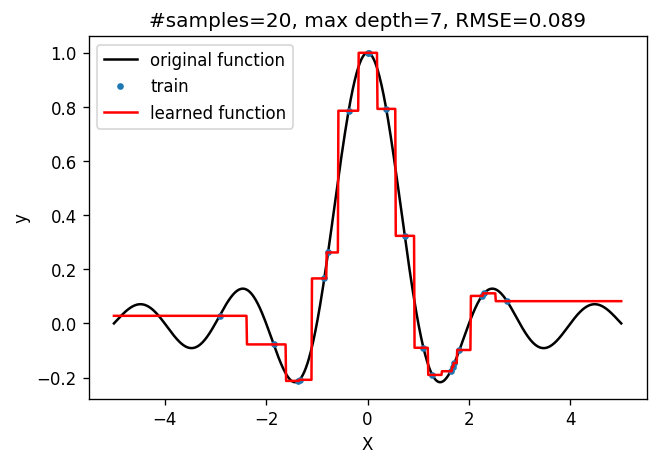

In [14]:
plot_depth(7)

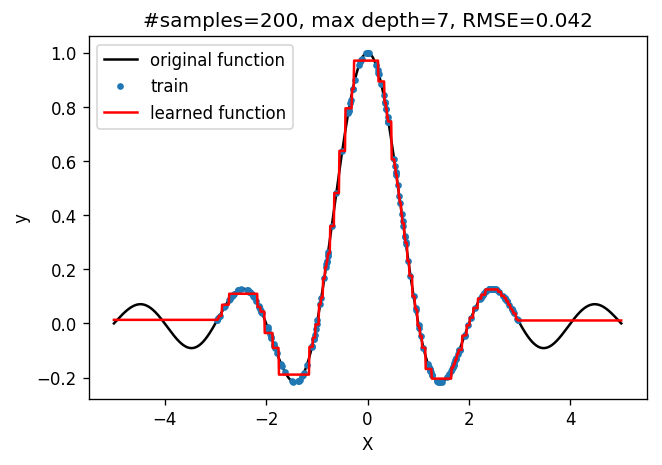

In [15]:
np.random.seed(1234)
xtrain, ytrain, xtest, ytrue = create_trainset(nonlinfunc,ntrain=200)
plot_depth(7)

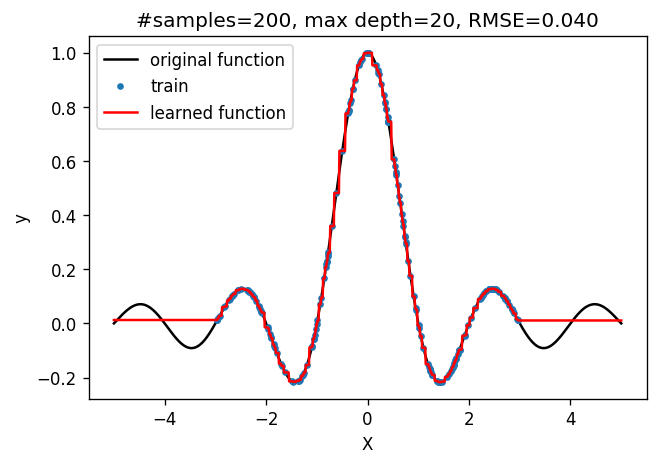

In [16]:
plot_depth(20)

# What about noise ?

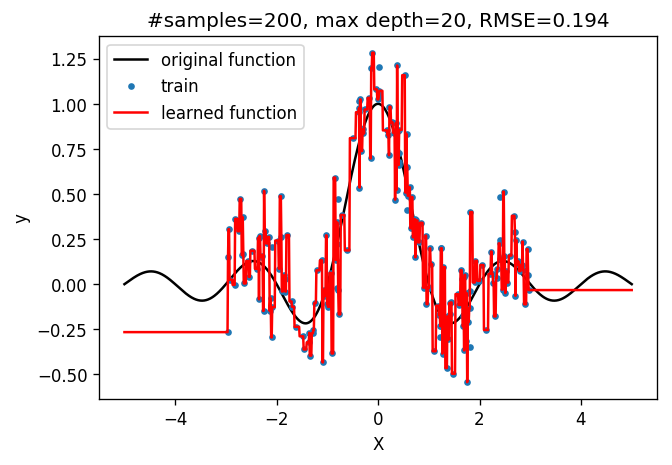

In [17]:
np.random.seed(1234)
xtrain, ytrain, xtest, ytrue = create_trainset(nonlinfunc,ntrain=200, noise=0.2)
plot_depth(20)

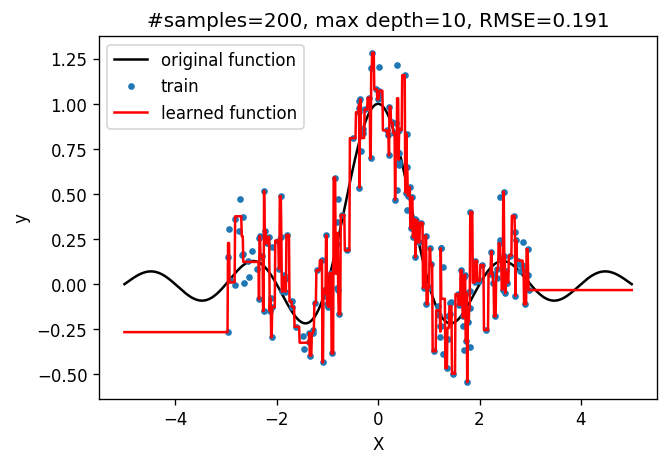

In [18]:
plot_depth(10)

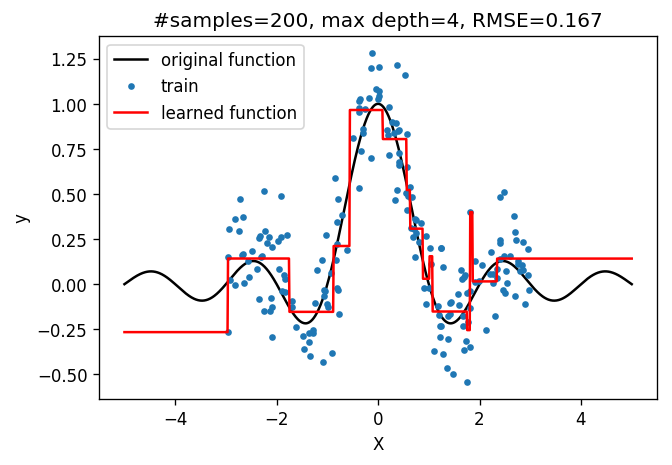

In [19]:
plot_depth(4)

# You enter the forest ... 
<br>
<div align="left">
<img src="images/forest.jpg" style="width:600px"/>
</div>

# The Random Forest
Idea:
 - train a bunch of weaker trees on random subsets of the data
     - less deep
     - only considering a subset of the features
     - ** to minimise sensitivity to overtraining**
 - average their results out 
 
Generalised to bagging methods (="bootstrap aggreggating")
 - a lot of "weak" learners can be bagged


In [20]:
def plot_depth_random_forest(idepth):
    pl.plot(xtest,ytrue,'k-',label="original function")
    pl.plot(xtrain,ytrain,'C0.',label='train')
    rf = RandomForestRegressor(500,max_depth=idepth)
    rf.fit(xtrain.reshape(-1,1), ytrain)
    pred = rf.predict(xtest.reshape(-1,1))
    for tree in rf.estimators_[:100]:
        pl.plot(xtest,tree.predict(xtest.reshape(-1,1)),'C1-',alpha=0.1)
    pl.plot(xtest,tree.predict(xtest.reshape(-1,1)),'C1-',alpha=0.1,label='individual trees')
    pl.plot(xtest,pred,'r-',label='average of trees')
    rmse = np.sqrt(((ytrue-pred)**2).mean())
    pl.title("#samples={}, max depth={}, RMSE={:5.3f}".format(len(xtrain),idepth, rmse))
    pl.xlabel("X")
    pl.ylabel("y")
    pl.legend(loc='upper left')

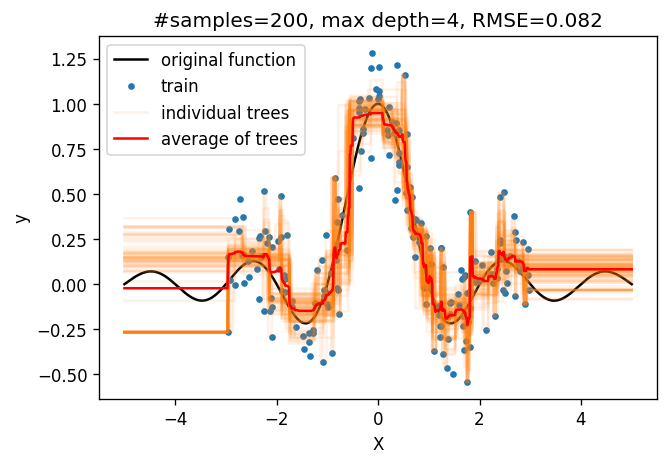

In [21]:
plot_depth_random_forest(4)

# Photometric reshift example

Estimate redshift of a galaxie without having to record a full spectrum

**Photometric redshifts for the SDSS Data Release 12** 

*Robert Beck; Laszlo Dobos; Tamas Budavari; Alexander S. Szalay; Istvan Csabai*

Monthly Notices of the Royal Astronomical Society 2016 460 (2): 1371-1381

doi: 10.1093/mnras/stw1009

http://www.vo.elte.hu/papers/2016/photoz/


# Photometric reshift example

<br>
<div align="left">
<img src="images/SDSS_filter_spec.jpeg" style="width:400px"/>
</div>
*Smolcic et al. 2006*

In [54]:
# loading all the samples (nsamples = -1) can lead to long computation times. 
# If you want to reduce these, reduce the number of samples. 
# Eg nsamples=100000

nsamples=200000

t = Table.read('data/photoz_dataset.txt', format='ascii.commented_header', data_end=nsamples)
X = np.array([t['r_mag'], t['(u-g)'], t['(g-r)'], t['(r-i)'], t['(i-z)']]).T
y = np.array(t['specz'])
t

objID,r_mag,(u-g),(g-r),(r-i),(i-z),specz,specz_err,r_mag_err,(u-g)_err,(g-r)_err,(r-i)_err,(i-z)_err
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1237645879573873373,20.103556,0.61777878,1.5659828,0.80243492,0.34698868,0.50467163,0.00020466947,0.12190636211279779,0.7569993424418415,0.1856641077267804,0.08918345792766323,0.16939028255106794
1237645941824356668,19.704782,1.289072,1.1333313,0.51053619,0.41262436,0.36670265,6.5150554e-05,0.0655080060003986,0.33961256317629146,0.05978348297217164,0.0364401446169884,0.06327843123851273
1237645942898230100,20.193981,0.65864944,1.6796875,0.97254181,0.42072105,0.51120573,9.6673393e-05,0.06894538211721137,0.4696232662930288,0.13246810970813222,0.04741867468974273,0.07219557530687769
1237645943434969247,17.664146,2.3386784,1.3168621,0.52295685,0.30891609,0.2178527,2.8101276e-05,0.034146275497393484,0.2086004253407079,0.017263574133549436,0.010426318102097713,0.016662031474130867
1237645943973609779,20.679634,2.8722134,1.285862,0.78954506,0.42936516,0.53021437,0.00012953312,0.08482012218868118,0.9404929344359603,0.14391915658624657,0.07034844106473559,0.10070183666858297
1237646586638631776,17.648102,1.2305584,0.77993202,0.39781952,0.19709969,0.12130364,1.3130572e-05,0.04140241865153553,0.2656704256725191,0.03141473544805958,0.020330210959204627,0.036698848342571165
1237646586638696975,17.390694,1.8147697,0.99510956,0.45385933,0.34827614,0.12077779,2.1676848e-05,0.0404870914021047,0.4983410051472198,0.03283435383999303,0.018127467166179162,0.027556321567178722
1237646586639287212,18.276638,0.63219833,1.3370743,0.44069099,0.32370758,0.27851638,3.7723737e-05,0.09077032654908011,1.2388604557839884,0.17696659585781443,0.06197666372981022,0.09387934854518722
1237646587173340066,17.29701,1.1269169,0.68570518,0.26628304,0.2367115,0.15302545,3.2831675e-05,0.04995095286032848,0.08662077996581817,0.017630657351227326,0.016086336565440434,0.03967631810790787


# Some terminology
The 4 columns *r_mag, (u-g), (g-r), (r-i), (i-z)* are called **features**

*specz* is the **predicted quantity**

A line of the table is a **sample**

Here we try to predict 1 quantity from 5 features using 1065891 samples 

# Having a look at the data
A continous histogram of redshifts

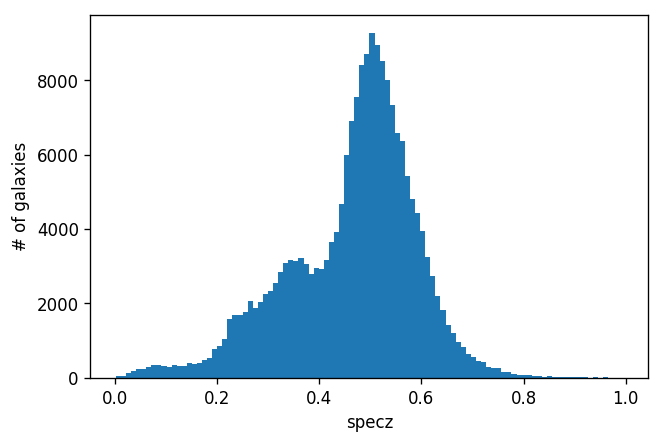

In [55]:
pl.hist(y, bins=100)
pl.xlabel('specz')
pl.ylabel('# of galaxies')
pl.show()

# Having a look at the data
Feature spaces

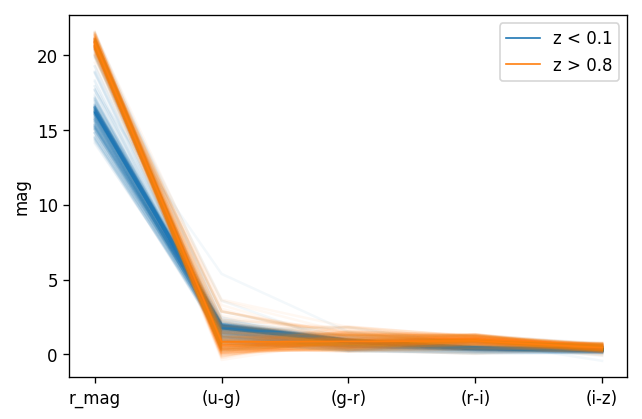

In [56]:
#low z
lowz = X[y<0.1]
for z in lowz[:200]:
    pl.plot(z,'C0',alpha=0.05)
pl.plot(np.mean(lowz,0),'C0',lw=1,label='z < 0.1')
#high z
highz = X[y>0.8]
for z in highz[:200]:
    pl.plot(z,'C1',alpha=0.05)
pl.plot(np.mean(highz,0),'C1',lw=1,label='z > 0.8')
pl.ylabel('mag')
pl.xticks([0,1,2,3,4],t.colnames[1:])
pl.xticks
pl.legend()
pl.show()

# Having a look at the data
Feature spaces (zooming in)

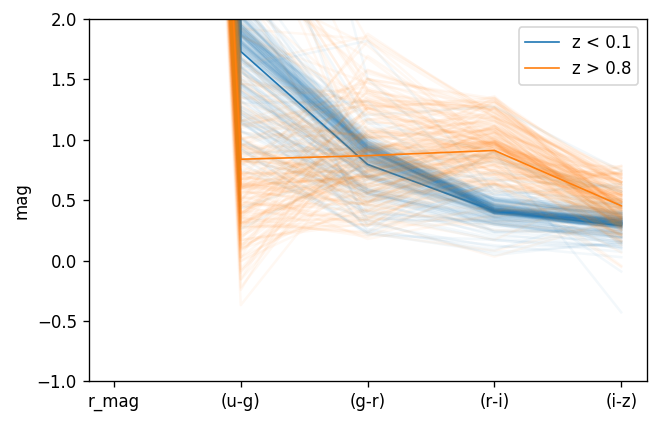

In [57]:
#low z
lowz = X[y<0.1]
for z in lowz[:200]:
    pl.plot(z,'C0',alpha=0.05)
pl.plot(np.mean(lowz,0),'C0',lw=1,label='z < 0.1')
#high z
highz = X[y>0.8]
for z in highz[:200]:
    pl.plot(z,'C1',alpha=0.05)
pl.plot(np.mean(highz,0),'C1',lw=1,label='z > 0.8')
pl.ylabel('mag')
pl.xticks([0,1,2,3,4],t.colnames[1:])
pl.ylim([-1,2])
pl.xticks
pl.legend()
pl.show()

# Check a linear model to have a benchmark for the improvement

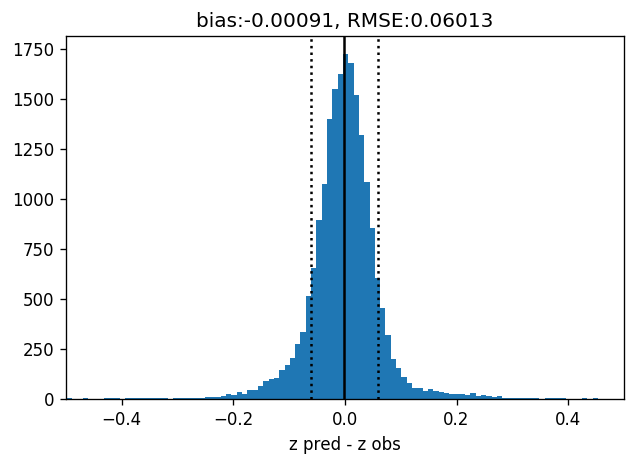

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

diff = y_pred-y_test
bias = np.mean(diff)
rmse = np.sqrt(np.mean(diff**2))
rmse_linear = rmse.copy()

pl.hist(diff, bins=100)
pl.axvline(bias,color='k')
pl.axvline(bias-rmse,color='k',ls=':')
pl.axvline(bias+rmse,color='k',ls=':')
pl.xlim([-0.5,0.5])
pl.xlabel("z pred - z obs")
pl.title("bias:{:6.5f}, RMSE:{:4.5f}".format(bias, rmse))
pl.show()

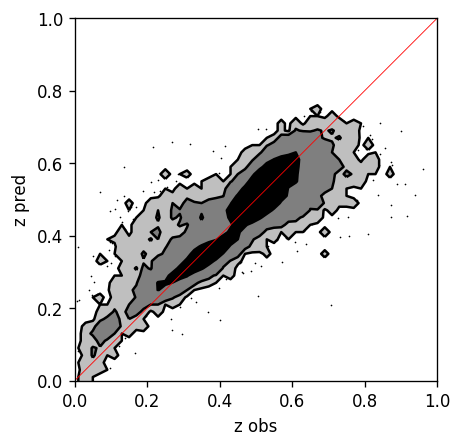

In [59]:
fig, ax = pl.subplots()
hist2d(y_test,y_pred,bins=50,ax=ax,range=[[0,1],[0,1]],levels=[0.68,0.95,0.997],plot_density=False,fill_contours=True,data_kwargs={'alpha':1,'marker':'.'})
ax.set_aspect('equal')
ax.set_ylabel("z pred")
ax.set_xlabel("z obs")
pl.plot([0,1],[0,1],'r-',lw=0.5)
pl.show()

# Out of the box random forest 

CPU times: user 18.7 s, sys: 149 ms, total: 18.8 s
Wall time: 3.52 s
CPU times: user 220 ms, sys: 41.5 ms, total: 262 ms
Wall time: 109 ms


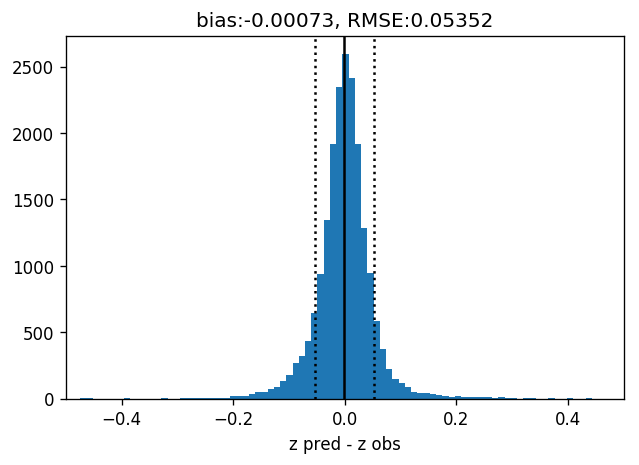

In [60]:
np.random.seed(1234)
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_jobs=8, random_state=1234)

%time fit = rf.fit(X_train, y_train)
%time y_pred = rf.predict(X_test)

diff = y_pred-y_test
bias = np.mean(diff)
rmse = np.sqrt(np.mean(diff**2))
rmse_default = rmse.copy()

pl.hist(diff, bins=100)
pl.axvline(bias,color='k')
pl.axvline(bias-rmse_default,color='k',ls=':')
pl.axvline(bias+rmse_default,color='k',ls=':')
pl.xlim([-0.5,0.5])
pl.xlabel("z pred - z obs")
pl.title("bias:{:6.5f}, RMSE:{:4.5f}".format(bias, rmse_default))
pl.show()

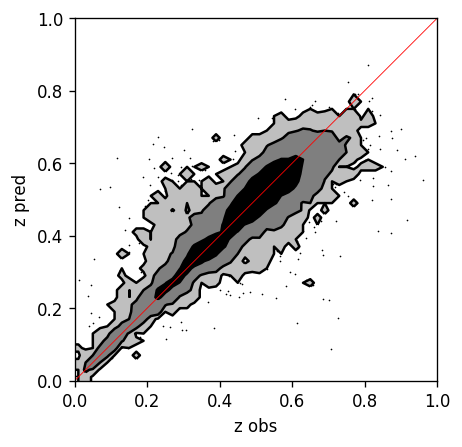

In [61]:
fig, ax = pl.subplots()
hist2d(y_test,y_pred,bins=50,ax=ax,range=[[0,1],[0,1]],levels=[0.68,0.95,0.997],plot_density=False,fill_contours=True,data_kwargs={'alpha':1,'marker':'.'})
ax.set_aspect('equal')
ax.set_ylabel("z pred")
ax.set_xlabel("z obs")
pl.plot([0,1],[0,1],'r-',lw=0.5)
pl.show()

# Results 


In [62]:
print("A full {:5.2f}% improvement of the root mean squared error FTW !!".format(100*(1-rmse_default/rmse_linear)))

A full 10.99% improvement of the root mean squared error FTW !!


But there are a lot of parameters of the random forest we should be able to tweak !

Parameters of a learning algorithm = **hyperparameters**

In [63]:
for key, value in rf.get_params().items():
    print("{:<30}:{}".format(key, value))

bootstrap                     :True
criterion                     :mse
max_depth                     :None
max_features                  :auto
max_leaf_nodes                :None
min_impurity_decrease         :0.0
min_impurity_split            :None
min_samples_leaf              :1
min_samples_split             :2
min_weight_fraction_leaf      :0.0
n_estimators                  :10
n_jobs                        :8
oob_score                     :False
random_state                  :1234
verbose                       :0
warm_start                    :False


# How do we choose the best values ?
### Cross validation 

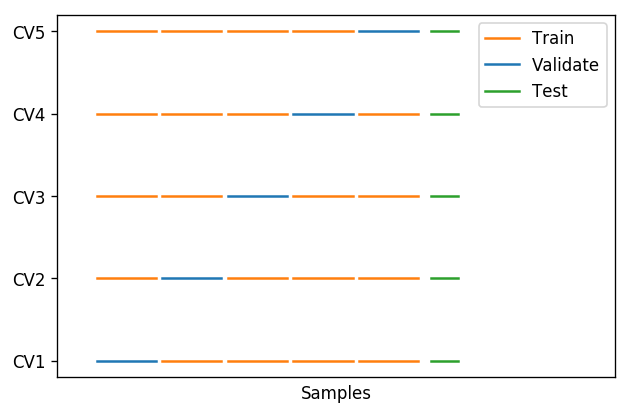

In [64]:
fig, ax = pl.subplots(1)
y_pos = 0
x_pos = np.arange(5)
for j in range(5):
    for i in range(5):
        if (i==j):
            color = 'C0'
        else:
            color = 'C1'
        pl.plot([x_pos[i]+.1,x_pos[i]+1],[j,j],color=color)
        
for j in range(5):
    pl.plot([x_pos[-1]+1.2,x_pos[-1]+1.6],[j,j],color='C2')

pl.plot([0,0],[0,0],color='C1',label='Train')
pl.plot([0,0],[0,0],color='C0',label='Validate')
pl.plot([0,0],[0,0],color='C2',label='Test')
pl.xlim([-.50,8])
pl.yticks(range(0,5),['CV{}'.format(i+1) for i in range(5)])
pl.xticks([])
pl.xlabel('Samples')
pl.legend()
pl.show()

## An obvious choice of hyperparameter: `n_estimators`

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {
   'n_estimators': list(map(int,np.logspace(1,2.3,5))), 
  },
 ]
GridSearchRF = GridSearchCV(rf,param_grid,scoring='neg_mean_squared_error',cv=5,verbose=0,n_jobs=8,return_train_score=True)
out = GridSearchRF.fit(X_train[:10000], y_train[:10000])

In [66]:
GridSearchRF.cv_results_
param = GridSearchRF.cv_results_['param_n_estimators'].data
mean_time = GridSearchRF.cv_results_['mean_fit_time']
std_time = GridSearchRF.cv_results_['std_fit_time']
mean_train = GridSearchRF.cv_results_['mean_train_score']
mean_test = GridSearchRF.cv_results_['mean_test_score']
std_train = GridSearchRF.cv_results_['std_train_score']
std_test = GridSearchRF.cv_results_['std_test_score']

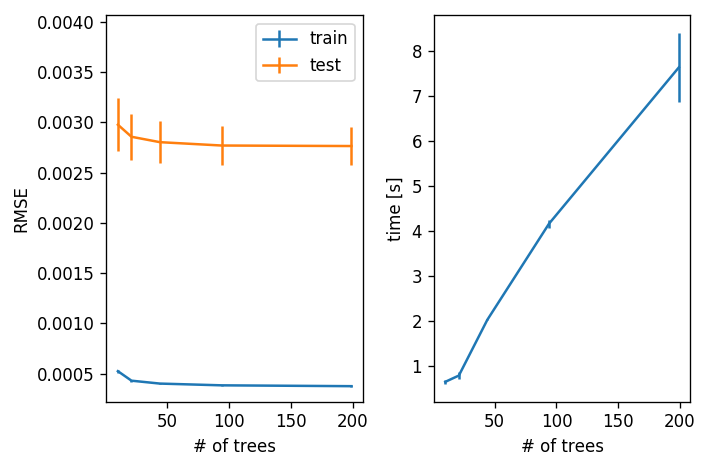

In [67]:
fig,ax = pl.subplots(1,2)
ax[0].errorbar(param,-mean_train,std_train,label='train')
ax[0].errorbar(param,-mean_test,std_test,label='test')
ax[0].legend()
ax[0].set_xlabel('# of trees')
ax[0].set_ylabel('RMSE')
ax[0].set_ylim(ymax=1.2*ax[0].get_ylim()[1])
ax[1].errorbar(param,mean_time,std_time)
ax[1].set_ylabel('time [s]')
ax[1].set_xlabel('# of trees')
pl.tight_layout()

# Exploring hyperparameter space
`max_features` and `max_depth`

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid = [
  {
   'max_features': [1, 2, 3, 4, 5], 
   'max_depth': list(range(1,20,2))
  },
 ]
rf.set_params(n_estimators=10)
GridSearchRF = GridSearchCV(rf,param_grid,scoring='neg_mean_squared_error',cv=5,verbose=0,n_jobs=8,return_train_score=True,refit=False)
out = GridSearchRF.fit(X_train, y_train)
best_params = out.best_params_

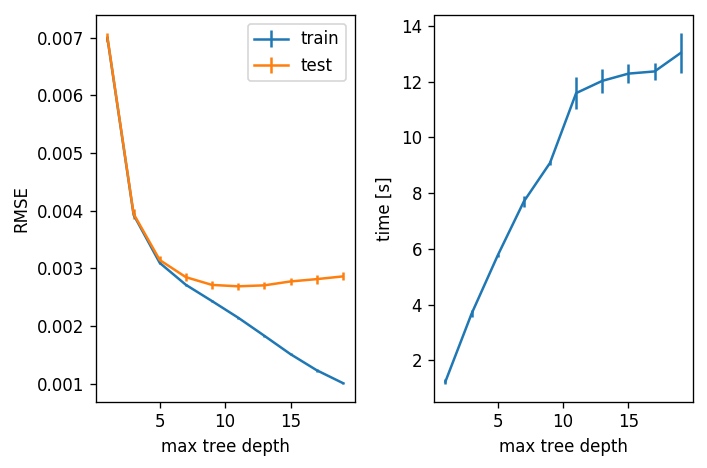

In [69]:
param = np.unique(GridSearchRF.cv_results_['param_max_depth'].data)
mean_time = GridSearchRF.cv_results_['mean_fit_time'].reshape(-1,5)[:,3]
std_time = GridSearchRF.cv_results_['std_fit_time'].reshape(-1,5)[:,3]
mean_train = GridSearchRF.cv_results_['mean_train_score'].reshape(-1,5)[:,3]
mean_test = GridSearchRF.cv_results_['mean_test_score'].reshape(-1,5)[:,3]
std_train = GridSearchRF.cv_results_['std_train_score'].reshape(-1,5)[:,3]
std_test = GridSearchRF.cv_results_['std_test_score'].reshape(-1,5)[:,3]

fig,ax = pl.subplots(1,2)
ax[0].errorbar(param,-mean_train,std_train,label='train')
ax[0].errorbar(param,-mean_test,std_test,label='test')
ax[0].legend()
ax[0].set_xlabel('max tree depth')
ax[0].set_ylabel('RMSE')
ax[1].errorbar(param,mean_time,std_time)
ax[1].set_ylabel('time [s]')
ax[1].set_xlabel('max tree depth')
pl.tight_layout()

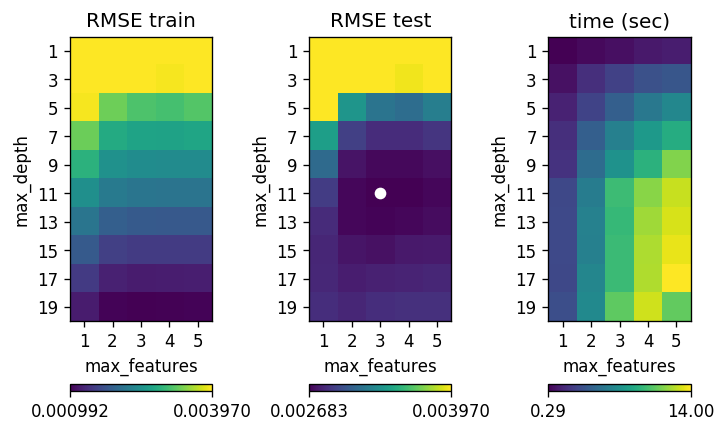

In [70]:
mean_train = -GridSearchRF.cv_results_['mean_train_score']
mean_test = -GridSearchRF.cv_results_['mean_test_score']
std_train = GridSearchRF.cv_results_['std_train_score']
std_test = GridSearchRF.cv_results_['std_test_score']
mean_time = GridSearchRF.cv_results_['mean_fit_time']
std_time = GridSearchRF.cv_results_['std_fit_time']

fig,axes = pl.subplots(1,3)
im0 = axes[0].imshow(mean_train.reshape(-1,5),vmin=mean_train.min(),vmax=4*mean_train.min())
pl.colorbar(im0,orientation='horizontal',ax=axes[0],ticks=[im0.norm.vmin,im0.norm.vmax])
axes[0].set_title('RMSE train')
im1 = axes[1].imshow(mean_test.reshape(-1,5),vmin=mean_test.min(), vmax=4*mean_train.min())
pl.colorbar(im1,orientation='horizontal',ax=axes[1],ticks=[im1.norm.vmin,im1.norm.vmax])
# axes[1].plot([best_params['max_depth'],best_params['max_features']],'wo')
axes[1].plot(best_params['max_features']-1,[11./2-0.5],'wo')
axes[1].set_title('RMSE test')
im2 = axes[2].imshow(mean_time.reshape(-1,5))
pl.colorbar(im2,orientation='horizontal',ax=axes[2],ticks=[im2.norm.vmin,im2.norm.vmax])
axes[2].set_title('time (sec)')
for ax in axes:
    ax.set_xticks(np.array(param_grid[0]['max_features'])-1)
    ax.set_yticks(np.array(param_grid[0]['max_depth'])/2.-0.5)
    ax.set_xticklabels(param_grid[0]['max_features'])
    ax.set_yticklabels(param_grid[0]['max_depth'])
    ax.set_xlabel('max_features')
    ax.set_ylabel('max_depth')
pl.tight_layout()


Best parameters:

In [71]:
for key, value in best_params.items():
    print("{:<30}:{}".format(key, value))
    


max_depth                     :11
max_features                  :3


### Optimized Random Forest

CPU times: user 8.11 s, sys: 102 ms, total: 8.21 s
Wall time: 1.74 s
CPU times: user 35.7 ms, sys: 6.07 ms, total: 41.8 ms
Wall time: 104 ms


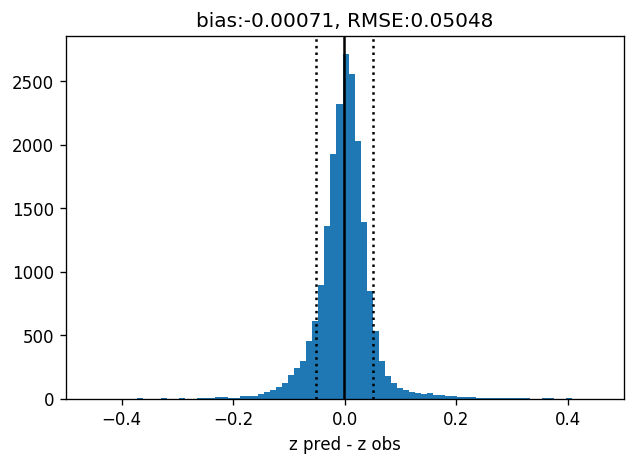

In [72]:
np.random.seed(1234)
rf = RandomForestRegressor(n_estimators=10,max_depth=best_params['max_depth'],max_features=best_params['max_features'], n_jobs=8, random_state=1234)

%time fit = rf.fit(X_train, y_train)
%time y_pred = rf.predict(X_test)

diff = y_pred-y_test
bias = np.mean(diff)
rmse = np.sqrt(np.mean(diff**2))
rmse_optimised = rmse.copy()

pl.hist(diff, bins=100)
pl.axvline(bias,color='k')
pl.axvline(bias-rmse_optimised,color='k',ls=':')
pl.axvline(bias+rmse_optimised,color='k',ls=':')
pl.xlim([-0.5,0.5])
pl.xlabel("z pred - z obs")
pl.title("bias:{:6.5f}, RMSE:{:4.5f}".format(bias, rmse_optimised))
pl.show()

## Improvement


In [73]:
print("For 10 trees a {:5.2f}% improvement from standard RF parameters".format(100*(1-rmse_optimised/rmse_default)))

For 10 trees a  5.68% improvement from standard RF parameters


# Final run
A large forest with optimized hyperparameters

CPU times: user 2min 55s, sys: 1.85 s, total: 2min 56s
Wall time: 28.6 s


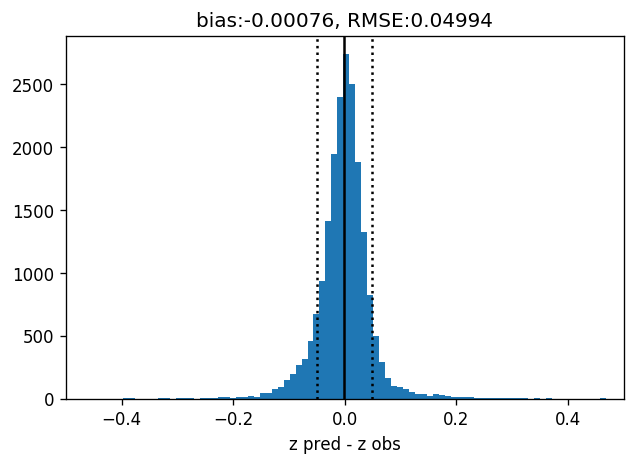

In [74]:
np.random.seed(1234)
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=200,max_depth=best_params['max_depth'],max_features=best_params['max_features'], n_jobs=8, random_state=1234)

%time fit = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

diff = y_pred-y_test
bias = np.mean(diff)
rmse = np.sqrt(np.mean(diff**2))
rmse_optimised_many_trees = rmse.copy()

pl.hist(diff, bins=100)
pl.axvline(bias,color='k')
pl.axvline(bias-rmse,color='k',ls=':')
pl.axvline(bias+rmse,color='k',ls=':')
pl.xlim([-0.5,0.5])
pl.xlabel("z pred - z obs")
pl.title("bias:{:6.5f}, RMSE:{:4.5f}".format(bias, rmse))
pl.show()

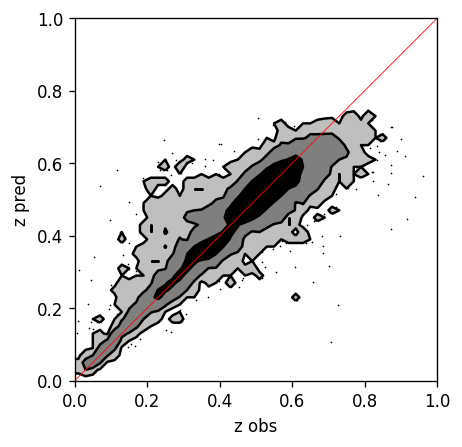

In [75]:
fig, ax = pl.subplots()
hist2d(y_test,y_pred,bins=50,ax=ax,range=[[0,1],[0,1]],levels=[0.68,0.95,0.997],plot_density=False,fill_contours=True,data_kwargs={'alpha':1,'marker':'.'})
ax.set_aspect('equal')
ax.set_ylabel("z pred")
ax.set_xlabel("z obs")
pl.plot([0,1],[0,1],'r-',lw=0.5)
pl.show()

## Final improvement


In [76]:
print("For a forest of {} trees and optimised parameters:\n - {:5.2f}% improvement from standard RF parameters \n - {:5.2f}% improvement from a linear model.".format(rf.get_params()['n_estimators'],100*(1-rmse_optimised_many_trees/rmse_default),100*(1-rmse_optimised_many_trees/rmse_linear)))

For a forest of 200 trees and optimised parameters:
 -  6.69% improvement from standard RF parameters 
 - 16.95% improvement from a linear model.


# Interpreting results
## Feature importance

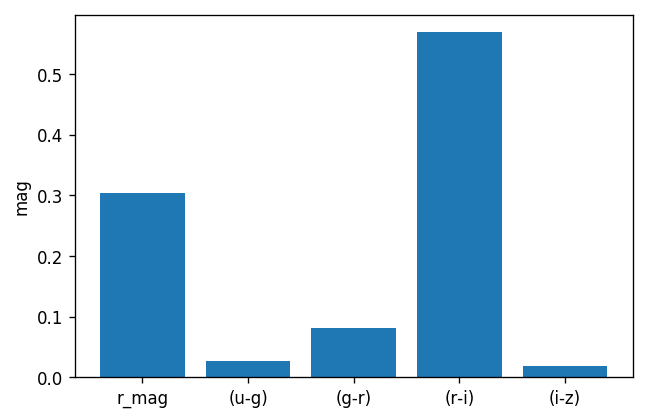

In [77]:
pl.bar(range(5),rf.feature_importances_)
pl.ylabel('mag')
pl.xticks([0,1,2,3,4],t.colnames[1:])
pl.xticks
pl.show()

# Interpreting results
## Individual contribution

In [78]:
from treeinterpreter import treeinterpreter as ti
nsamples = 5
lowz_features = X_test[y_test<0.1][:nsamples]
lowz_specz = y_test[y_test<0.1][:nsamples]

highz_features = X_test[y_test>0.8][:nsamples]
highz_specz = y_test[y_test>0.8][:nsamples]
format_str = "spec z:{:5.2f} photo z:{:5.2f} = {:5.2f} + {:5.2f} x " + " + {:5.2f} x ".join(t.colnames[1:6])
prediction, bias, contributions = ti.predict(rf, lowz_features)
for o, p, b, c in zip(lowz_specz, prediction, bias, contributions):
    print(format_str.format(o,p,b,*c))
print("")
prediction, bias, contributions = ti.predict(rf, highz_features)
for o, p, b, c in zip(highz_specz, prediction, bias, contributions):
    print(format_str.format(o,p,b,*c))


spec z: 0.08 photo z: 0.07 =  0.46 + -0.17 x r_mag + -0.00 x (u-g) + -0.08 x (g-r) + -0.13 x (r-i) + -0.00 x (i-z)
spec z: 0.05 photo z: 0.07 =  0.46 + -0.17 x r_mag + -0.00 x (u-g) + -0.08 x (g-r) + -0.12 x (r-i) + -0.01 x (i-z)
spec z: 0.06 photo z: 0.06 =  0.46 + -0.19 x r_mag + -0.00 x (u-g) + -0.08 x (g-r) + -0.13 x (r-i) + -0.00 x (i-z)
spec z: 0.06 photo z: 0.10 =  0.46 + -0.13 x r_mag + -0.01 x (u-g) + -0.09 x (g-r) + -0.13 x (r-i) + -0.00 x (i-z)
spec z: 0.05 photo z: 0.13 =  0.46 + -0.16 x r_mag + -0.01 x (u-g) + -0.04 x (g-r) + -0.14 x (r-i) +  0.00 x (i-z)

spec z: 0.84 photo z: 0.51 =  0.46 +  0.12 x r_mag +  0.03 x (u-g) +  0.01 x (g-r) + -0.14 x (r-i) +  0.03 x (i-z)
spec z: 0.94 photo z: 0.51 =  0.46 +  0.09 x r_mag +  0.02 x (u-g) +  0.03 x (g-r) + -0.13 x (r-i) +  0.03 x (i-z)
spec z: 0.96 photo z: 0.57 =  0.46 +  0.03 x r_mag + -0.00 x (u-g) + -0.00 x (g-r) +  0.09 x (r-i) + -0.01 x (i-z)
spec z: 0.84 photo z: 0.63 =  0.46 + -0.00 x r_mag +  0.03 x (u-g) +  0.04 x (g

# Going further
## Being wary of extrapolation
Your data live in a lower dimentional subset of the parameter space

In [47]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(n_jobs=8,random_state=1234)
IF.fit(X_train)
outlier_prediction = IF.predict(X_test)

In [48]:
print(IF.predict([[1,1,1,1,1],]))
print("Proportion of false negative: {:5.1f}%".format((outlier_prediction == -1).sum()/len(outlier_prediction) * 100))

[-1]
Proportion of false negative:   9.8%


# Going further
## Uncertainty on the prediction ?
Quantile regression

In [49]:
#Ugly hack because scikit-garden requires numpy to be installed before (see https://github.com/scikit-garden/scikit-garden/issues/23)
import pip
def install(package):
    pip.main(['install', package])
_ = install('scikit-garden')

In [50]:
from skgarden import RandomForestQuantileRegressor
rfqr = RandomForestQuantileRegressor(max_depth=best_params['max_depth'],max_features=best_params['max_features'], n_jobs=8, random_state=1234)
fit = rfqr.fit(X_train, y_train)

In [91]:
np.random.seed(1234)
nsample = 5000
if nsample>len(X_test):
    print("No more samples than samples in the test set")
else:
    idx_subset = np.random.randint(0,len(X_test)+1,nsample)
    sorted_idx_samples = np.argsort(y_test[idx_subset])
    X_values = X_test[idx_subset][sorted_idx_samples]
    y_values = y_test[idx_subset][sorted_idx_samples]

    pred_med = rfqr.predict(X_values,quantile=50)
    pred_1sigm = rfqr.predict(X_values,quantile=15.87)
    pred_1sigp = rfqr.predict(X_values,quantile=84.13)
    pred_2sigm = rfqr.predict(X_values,quantile=2.28)
    pred_2sigp = rfqr.predict(X_values,quantile=97.73)

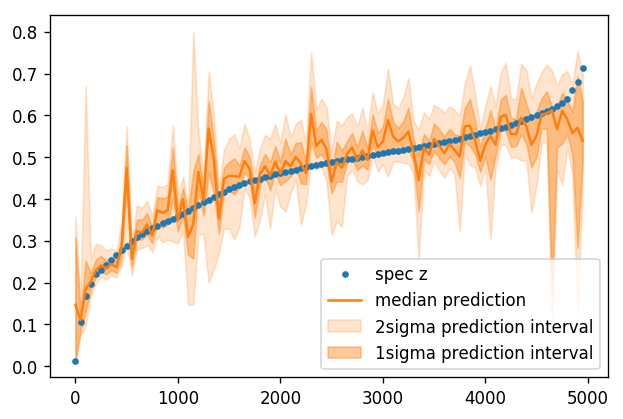

In [113]:
decimate = 50
pl.fill_between(range(nsample)[::decimate],pred_2sigm[::decimate],pred_2sigp[::decimate],color='C1',alpha=0.2,label='2sigma prediction interval')
pl.fill_between(range(nsample)[::decimate],pred_1sigm[::decimate], pred_1sigp[::decimate],color='C1',alpha=0.4,label='1sigma prediction interval')
pl.plot(range(nsample)[::decimate],y_values[::decimate],'C0',marker='.',ls='none',label='spec z')
pl.plot(range(nsample)[::decimate],pred_med[::decimate],'C1',label='median prediction')
pl.legend(loc='lower right')
pl.show()

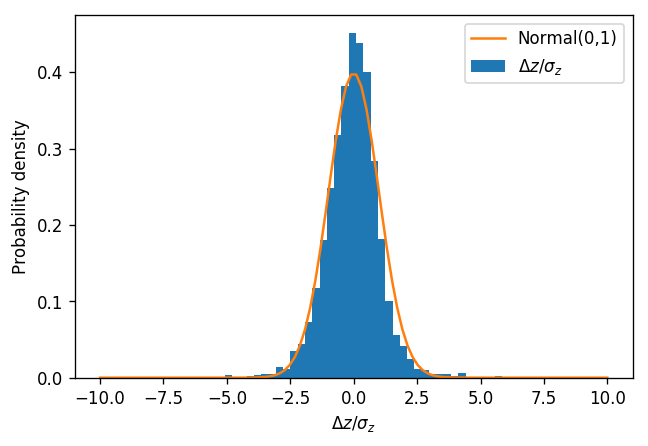

In [112]:
import scipy.stats as stats
_ = pl.hist((pred_med-y_values)/(0.5*(pred_1sigp-pred_1sigm)),bins=50,density=True,label="$\Delta z/\sigma_z$")
xvec = np.linspace(-10,10,100)
pl.plot(xvec, stats.norm.pdf(xvec),label='Normal(0,1)')
pl.legend()
pl.xlabel("$\Delta z/\sigma_z$")
pl.ylabel("Probability density")
pl.show()